In [47]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
import numpy as np
import math

(172, 173, 3)
(172, 173, 3)


Text(0.5, 1.0, 'Colorful')

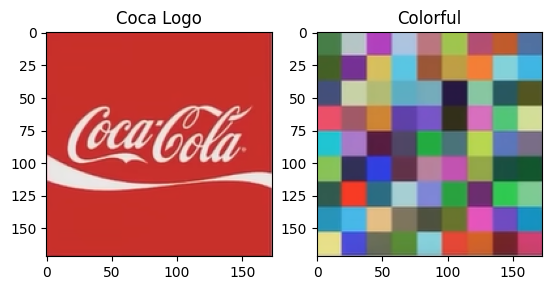

In [55]:
coca_path = os.path.join(os.getcwd(), "..", "..", "assets", "cocacola.png")
coca_img = cv.imread(coca_path)[:,:,::-1]

colorful_path = os.path.join(os.getcwd(), "..", "..", "assets", "colorful.png")
colorful_img = cv.imread(colorful_path)[:,:,::-1]

# width = coca_img.shape[1]
# aspect_ratio = width / colorful_img.shape[1]
# print(coca_img.shape)
# print(colorful_img.shape)
# height = math.ceil(aspect_ratio * colorful_img.shape[0])
colorful_img = cv.resize(colorful_img, (coca_img.shape[1], coca_img.shape[0]), interpolation=cv.INTER_AREA)

print(coca_img.shape)
print(colorful_img.shape)

plt.figure()
plt.subplot(121); plt.imshow(coca_img); plt.title("Coca Logo")
plt.subplot(122); plt.imshow(colorful_img); plt.title("Colorful")

Text(0.5, 1.0, 'INV MASK')

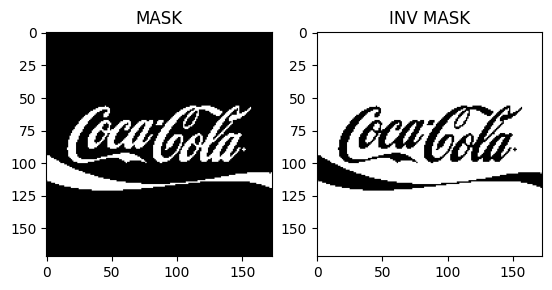

In [56]:
gray = cv.cvtColor(coca_img, cv.COLOR_BGR2GRAY)
ret, b_mask = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

inv_b_mask = cv.bitwise_not(b_mask)

plt.figure()
plt.subplot(121); plt.imshow(b_mask, cmap="gray"); plt.title("MASK")
plt.subplot(122); plt.imshow(inv_b_mask, cmap="gray"); plt.title("INV MASK")

(172, 173, 3)
(172, 173)


Text(0.5, 1.0, 'partial 2')

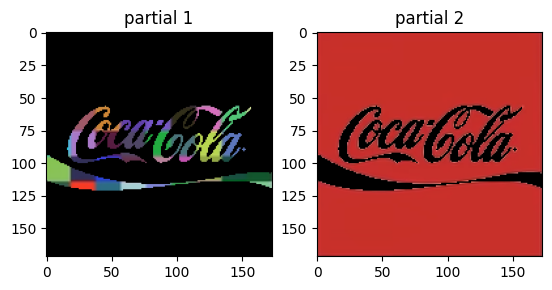

In [59]:
print(colorful_img.shape)
print(inv_b_mask.shape)
partial1 = cv.bitwise_and(colorful_img, colorful_img, mask=b_mask)
partial2 = cv.bitwise_and(coca_img, coca_img, mask=inv_b_mask)

plt.figure()
plt.subplot(121); plt.imshow(partial1); plt.title("partial 1")
plt.subplot(122); plt.imshow(partial2); plt.title("partial 2")

Text(0.5, 1.0, 'final')

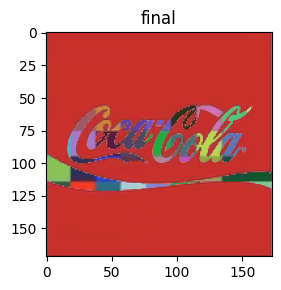

In [62]:
# final = cv.bitwise_or(partial1, partial2)
final = cv.add(partial1, partial2)

plt.figure()
plt.subplot(121); plt.imshow(final); plt.title("final")